# Статистический анализ двух бинарных выборок

## 📊 Условие задачи

### Исходные данные:
- **Две бинарные выборки** с вероятностями успеха:
  - $p_1 = 0.35$ (первая выборка)
  - $p_2 = 0.40$ (вторая выборка)
- **Уровень значимости**: $\alpha = 0.05$ (p-value)
- **Минимальный детектируемый эффект (MDE)**: $\delta = |p_2 - p_1| = 0.05$

### Поставленные задачи:

#### 1. 📈 Определение минимального размера выборки
**Цель**: Найти минимальное количество элементов $n$ в каждой выборке, необходимое для детекции MDE с заданной мощностью теста ($1 - \beta = 0.8$).

**Формула для расчета**:
$$
n = \frac{(z_{1-\alpha/2} \cdot \sqrt{2 \cdot \bar{p} \cdot (1-\bar{p})} + z_{1-\beta} \cdot \sqrt{p_1(1-p_1) + p_2(1-p_2)})^2}{(p_1 - p_2)^2}
$$

где:
- $\bar{p} = \frac{p_1 + p_2}{2}$ - объединенная пропорция
- $z_{1-\alpha/2}$ - квантиль нормального распределения для двустороннего теста
- $z_{1-\beta}$ - квантиль нормального распределения для мощности теста

#### 2. 🔄 Преобразование распределений через ЦПТ
**Цель**: Используя Центральную Предельную Теорему (ЦПТ), преобразовать биномиальные распределения к нормальным.

**Формулы преобразования**:
- Для выборки размера $n$ с вероятностью $p$:
  $$
  \text{Среднее: } \mu = p
  $$
  $$
  \text{Стандартное отклонение: } \sigma = \sqrt{\frac{p(1-p)}{n}}
  $$
- Получаем нормальные распределения:
  - Первая выборка: $N(\mu_1, \sigma_1)$
  - Вторая выборка: $N(\mu_2, \sigma_2)$

#### 3. 📊 Визуализация распределений и ошибок
**Требуется построить два графика**:

**График 1**: Двусторонняя альтернатива
- Распределения обеих выборок
- Критические области для ошибки I рода ($\alpha$)
- Область ошибки II рода ($\beta$)

**График 2**: Односторонняя альтернатива ($p_1 > p_2$)
- Распределения обеих выборок  
- Односторонние критические области
- Соответствующие области ошибок

**Обозначения на графиках**:
- 🟦 **Синяя область** - Ошибка I рода (вероятность $\alpha$)
- 🟥 **Красная область** - Ошибка II рода (вероятность $\beta$)
- 📍 **Вертикальные линии** - Критические значения и средние

#### 4. 📐 Расчет доверительных интервалов
**Цель**: Построить $95\%$ доверительные интервалы для средних значений обеих выборок.

**Формула доверительного интервала**:
$$
CI = \hat{p} \pm z_{1-\alpha/2} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

где:
- $\hat{p}$ - выборочная пропорция
- $z_{1-\alpha/2}$ - квантиль стандартного нормального распределения

### 🎯 Ожидаемые результаты:

1. **Числовой результат**: Минимальный размер выборки $n$
2. **Параметры распределений**: $\mu_1, \sigma_1, \mu_2, \sigma_2$
3. **Визуализация**: Два графика с областями статистических ошибок
4. **Интервальные оценки**: Доверительные интервалы для $p_1$ и $p_2$

### 📈 Статистические гипотезы:

**Для двустороннего теста**:
$$
H_0: p_1 = p_2 \\
H_1: p_1 \neq p_2
$$

**Для одностороннего теста**:
$$
H_0: p_1 \leq p_2 \\
H_1: p_1 > p_2
$$

In [66]:
# Импортируем все необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [ ]:
# Исходные данные
p1 = 0.35
p2 = 0.40
alpha = 0.05
power = 0.8

# 1. Определим минимальный размер выборки

# Квантили нормального распределения
z_alpha = norm.ppf(1 - alpha/2)  # двусторонний тест
z_beta = norm.ppf(power)

# Расчет
p_avg = (p1 + p2) / 2

# Стандартная ошибка разницы, если нулевая гипотеза Н0 верна:
std_error_h0 = math.sqrt(2 * p_avg * (1 - p_avg))
# Стандартная ошибка разницы, если альтернативная гипотеза Н1 верна:
std_error_h1 = math.sqrt(p1 * (1 - p1) + p2 * (1 - p2))

n = math.ceil((z_alpha * std_error_h0 + z_beta * std_error_h1) ** 2 / ((p1-p2)**2))

# Выведем результат, округленный в большую сторону до целого числа:
print(f"\nМинимальный размер каждой выборки: {n}")





Минимальный размер каждой выборки: 1471


In [68]:
# 2. Используя Центральную Предельную Теорему (ЦПТ), 
# 2.1. Преобразуем биномиальные распределения к нормальным для равных выборок при n = 1471

# Для первой выборки:
mu1 = p1
sigma1 = np.sqrt(p1 * (1 - p1) / n)

# Для второй выборки:
mu2 = p2
sigma2 = np.sqrt(p2 * (1 - p2) / n)

print("Равные выборки:")
print("Первая выборка (преобразование к N):")
print(f"  N(μ₁={mu1:.2f}, σ₁={sigma1:.4f})")

print("\nВторая выборка (преобразование к N):")
print(f"  N(μ₂={mu2:.2f}, σ₂={sigma2:.4f})")

# 2.2. Преобразуем биномиальные распределения к нормальным для неравных выборок
# в требованиях к формату вывода представлен пример, в котором n₁=735, n₂=7350,
# т.е. размер второй выборки существенно (в 10 раз) выше первой. Рассчитаем параметры N для этого случая

# Для первой выборки:
n1 = 735
mu1_ = p1
sigma1_ = np.sqrt(p1 * (1 - p1) / n1)

# Для второй выборки:
n2 = 7350
mu2 = p2
sigma2_ = np.sqrt(p2 * (1 - p2) / n2)

print("\nНЕравные выборки:")
print("Первая выборка (преобразование к N):")
print(f"  N(μ₁={mu1:.2f}, σ₁={sigma1_:.4f})")

print("\nВторая выборка (преобразование к N):")
print(f"  N(μ₂={mu2:.2f}, σ₂={sigma2_:.4f})")


Равные выборки:
Первая выборка (преобразование к N):
  N(μ₁=0.35, σ₁=0.0124)

Вторая выборка (преобразование к N):
  N(μ₂=0.40, σ₂=0.0128)

НЕравные выборки:
Первая выборка (преобразование к N):
  N(μ₁=0.35, σ₁=0.0176)

Вторая выборка (преобразование к N):
  N(μ₂=0.40, σ₂=0.0057)


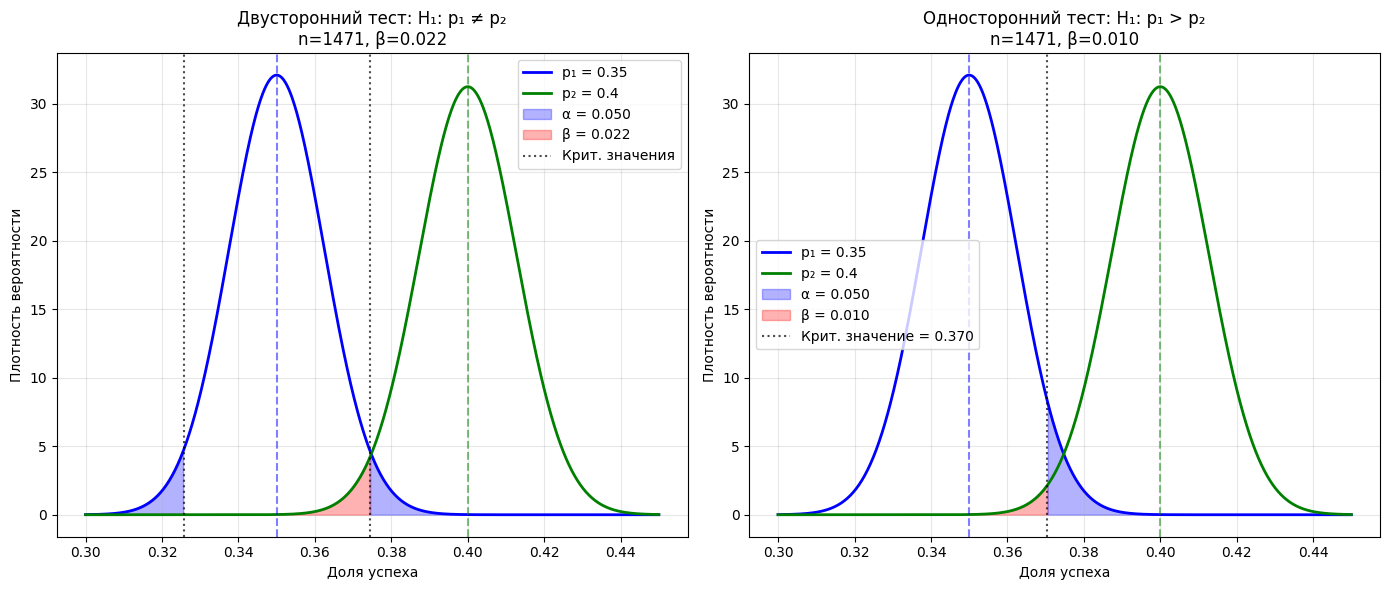

In [69]:
# 3. Визуализируем распределения и ошибки для равных выборок
# (в условии задаче и формате ответа не требуется иное/не уточнено, для каких объемов выборки требуется построить графики)

# Критические значения для разных тестов
z_alpha_two_sides = norm.ppf(1 - alpha/2)  # двусторонний тест
z_alpha_one_side = norm.ppf(1 - alpha)    # односторонний тест

crit_left_two_sides = mu1 - z_alpha_two_sides * sigma1     # левая граница (двусторонний)
crit_right_two_sides = mu1 + z_alpha_two_sides * sigma1  # правая граница (двусторонний)
crit_right_one_side = mu1 + z_alpha_one_side * sigma1  # критическое значение (односторонний)

# Ошибки для разных тестов:
beta_two_sides = norm.cdf(crit_right_two_sides, mu2, sigma2) - norm.cdf(crit_left_two_sides, mu2, sigma2)
beta_one_side = norm.cdf(crit_right_one_side, mu2, sigma2)

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

x = np.linspace(0.3, 0.45, 1000) #диапазон определен эмпирически для наглядной визуализации
y1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(x, mu2, sigma2)

# График 1: Двусторонний тест
ax1.plot(x, y1, 'b-', label=f'p₁ = {p1}', linewidth=2)
ax1.plot(x, y2, 'g-', label=f'p₂ = {p2}', linewidth=2)

# Ошибка I рода (α)
ax1.fill_between(x[x <= crit_left_two_sides], 0, y1[x <= crit_left_two_sides], alpha=0.3, color='blue', label=f'α = {alpha:.3f}')
ax1.fill_between(x[x >=crit_right_two_sides], 0, y1[x >=crit_right_two_sides], alpha=0.3, color='blue')

# Ошибка II рода (β)
beta_area = (x >= crit_left_two_sides) & (x <= crit_right_two_sides)
ax1.fill_between(x[beta_area], 0, y2[beta_area], alpha=0.3, color='red', label=f'β = {beta_two_sides:.3f}')

# Вертикальные линии для средних и критических значений
ax1.axvline(mu1, color='blue', linestyle='--', alpha=0.5)
ax1.axvline(mu2, color='green', linestyle='--', alpha=0.5)
ax1.axvline(crit_left_two_sides, color='black', linestyle=':', alpha=0.7)
ax1.axvline(crit_right_two_sides, color='black', linestyle=':', alpha=0.7, label=f'Крит. значения')

ax1.set_xlabel('Доля успеха')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title(f'Двусторонний тест: H₁: p₁ ≠ p₂\nn={n}, β={beta_two_sides:.3f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Односторонний тест H₁: p₁ > p₂
ax2.plot(x, y1, 'b-', label=f'p₁ = {p1}', linewidth=2)
ax2.plot(x, y2, 'g-', label=f'p₂ = {p2}', linewidth=2)

# Ошибка I рода (α)
ax2.fill_between(x[x > crit_right_one_side], 0, y1[x > crit_right_one_side], alpha=0.3, color='blue', label=f'α = {alpha:.3f}')

# Ошибка II рода (β)
ax2.fill_between(x[x <= crit_right_one_side], 0, y2[x <= crit_right_one_side], alpha=0.3, color='red', label=f'β = {beta_one_side:.3f}')

# Вертикальные линии
ax2.axvline(mu1, color='blue', linestyle='--', alpha=0.5)
ax2.axvline(mu2, color='green', linestyle='--', alpha=0.5)
ax2.axvline(crit_right_one_side, color='black', linestyle=':', alpha=0.7, label=f'Крит. значение = {crit_right_one_side:.3f}')

ax2.set_xlabel('Доля успеха')
ax2.set_ylabel('Плотность вероятности')
ax2.set_title(f'Односторонний тест: H₁: p₁ > p₂\nn={n}, β={beta_one_side:.3f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




Для одностороннего теста (H1: p1 > p2) мы получили β=0.009. Это означает, что если бы H1 была верна, вероятность пропустить эффект составила бы всего 0.9%. Однако в нашем случае p1 < p2 (согласно наблюдаемой картине), поэтому H1 фактически неверна, и рассчитанный β имеет гипотетический характер.

In [70]:
# 4. Построим 95% CI для средних значений обеих выборок
# 4.1. Для равных выборок:
#критическое значение z и стандартное отклонение для обеих выборок было рассчитано ранее
ci1_lower = p1 - z_alpha_two_sides * sigma1
ci1_upper = p1 + z_alpha_two_sides * sigma1

ci2_lower = p2 - z_alpha_two_sides * sigma2
ci2_upper = p2 + z_alpha_two_sides * sigma2

print('CI для средних значений равных выборок')
print(f"Группа 1 (p₁ = {p1}):")
print(f"  Доверительный интервал: [{ci1_lower:.4f}, {ci1_upper:.4f}] (ширина {(ci1_upper-ci1_lower):.4f})")

print(f"\nГруппа 2 (p₂ = {p2}):")
print(f"  Доверительный интервал: [{ci2_lower:.4f}, {ci2_upper:.4f}] (ширина {(ci2_upper-ci2_lower):.4f})")

# 4.2. Для Неравных выборок:
#критическое значение z и стандартное отклонение для обеих выборок было рассчитано ранее
ci1_lower_ = p1 - z_alpha_two_sides * sigma1_
ci1_upper_ = p1 + z_alpha_two_sides * sigma1_

ci2_lower_ = p2 - z_alpha_two_sides * sigma2_
ci2_upper_ = p2 + z_alpha_two_sides * sigma2_

print('\nCI для средних значений неравных выборок')
print(f"Группа 1 (p₁ = {p1}):")
print(f"  Доверительный интервал: [{ci1_lower_:.4f}, {ci1_upper_:.4f}] (ширина {(ci1_upper_-ci1_lower_):.4f})")

print(f"\nГруппа 2 (p₂ = {p2}):")
print(f"  Доверительный интервал: [{ci2_lower_:.4f}, {ci2_upper_:.4f}] (ширина {(ci2_upper_-ci2_lower_):.4f})")

CI для средних значений равных выборок
Группа 1 (p₁ = 0.35):
  Доверительный интервал: [0.3256, 0.3744] (ширина 0.0487)

Группа 2 (p₂ = 0.4):
  Доверительный интервал: [0.3750, 0.4250] (ширина 0.0501)

CI для средних значений неравных выборок
Группа 1 (p₁ = 0.35):
  Доверительный интервал: [0.3155, 0.3845] (ширина 0.0690)

Группа 2 (p₂ = 0.4):
  Доверительный интервал: [0.3888, 0.4112] (ширина 0.0224)


Важное наблюдение:

1. Для равных выборок: ДИ для средних двух выборок не перекрываются. Это говорит о статистически значимой разнице между двумя выборками на уровне 5% (альфа = 0.05). Ширина интервалов схожа у двух групп.

2. Для неравных выборок: наблюдается существенное различие в ширине интервалов: для группы p1 с небольшой выборкой ширина почти в 3 раза шире, чем для группы p1 с численностью выборки более 7 тыс. Это говорит о том, что в группе p1 неопределенность существенно выше, чем в p2 из-за малого объема данных.
Тем не менее, ДИ по-прежнему не перекрываются. Это подтверждает стат. значимость различий между группами даже при неравных объемах выборок.

Рассчитаем мощность тестов для того, чтобы сделать окончательный вывод о том, что лучше:
 - равные выборки с минимально необходимым n в каждой группе
 - или неравные группы с существенно большей чем 2n суммарной численностью, но где в одной группе численность меньше n, а в другой составляет 5n

In [43]:
# 1. Равные выборки:

se_diff_eq = np.sqrt(sigma1**2 + sigma2**2)
delta_eq = (p2 - p1) / se_diff_eq
z_two = norm.ppf(1 - alpha/2)
z_one = norm.ppf(1 - alpha)

power_two_eq = 1 - (norm.cdf(z_two - delta_eq) - norm.cdf(-z_two - delta_eq))
power_one_eq = 1 - norm.cdf(z_one - delta_eq)

print(f"Равные выборки (n₁=n₂={n}):")
print(f"  Двусторонний тест: мощность = {power_two_eq:.3f}")
print(f"  Односторонний тест: мощность = {power_one_eq:.3f}")

# 2. Неравные выборки:
se_diff_u = np.sqrt(sigma1_**2 + sigma2_**2)
delta_u = (p2 - p1) / se_diff_u

power_two_u = 1 - (norm.cdf(z_two - delta_u) - norm.cdf(-z_two - delta_u))
power_one_u = 1 - norm.cdf(z_one - delta_u)

print(f"\n Неравные выборки(n₁={n1}, n₂={n2}):")
print(f"  Двусторонний тест: мощность = {power_two_u:.3f}")
print(f"  Односторонний тест: мощность = {power_one_u:.3f}")


Равные выборки (n₁=n₂=1471):
  Двусторонний тест: мощность = 0.801
  Односторонний тест: мощность = 0.877

 Неравные выборки(n₁=735, n₂=7350):
  Двусторонний тест: мощность = 0.771
  Односторонний тест: мощность = 0.855


Мы видим, что в случае неравных выборок мощность тестов снизилась. Причем это произошло несмотря на то, что общее число наблюдений возросло. Т.е. мощность тестов ограничивается малой численностью первой группы.
Таким образом, если на практике есть возможность обеспечить наличие равных выборок с минимально необходимой численностью (для обеспечения желаемой мощности и MDE), то это вариант более предпочтителен, чем дисбаланс групп.

Уточним, что на практике неравные выборки могут быть оправданы, когда:
- одна группа значительно дороже или дефицитнее
- необходимо минимизировать риск для большинства участников (например, когда есть риск негативного влияния воздействия новой коммуникации/акции на отток клиентов)
- требуется быстро получить результаты по новой группе

В таких случаях принимается осознанное решение пожертвовать частью статистической мощности ради практических преимуществ.